In [20]:
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

y = np.load('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0/learning_curves.npy')[()]


In [60]:
def plotcurves1(path):
    file=np.load(path + '/learning_curves.npy')
    plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    plt.plot(x, y['train_ppls'], label='train')
    plt.plot(x, y['val_ppls'], label='valid')

    plt.xlabel('epoch')
    plt.ylabel('PPL')
    plt.legend()

    plt.show()

In [67]:
def plotcurves2(path):
#     file=np.load(path + '/log.txt')
    log = pandas.read_csv(path + "/log.txt", header=None, delimiter='\t')
    x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()
    
    plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    plt.plot(x2, y['train_ppls'], label='train')
    plt.plot(x2, y['val_ppls'], label='valid')

    plt.xlabel('time (sec)')
    plt.ylabel('PPL')
    plt.legend()

    plt.show()

In [97]:
def plotcurves3(path):
    file=np.load(path + '/learning_curves.npy')
    
    fig=plt.figure(figsize=(16, 6))
    
#     plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    
    fig.add_subplot(1,2,1)
    plt.plot(x, y['train_ppls'], label='train')
    plt.plot(x, y['val_ppls'], label='valid')

    plt.xlabel('epoch')
    plt.ylabel('PPL')
    plt.legend()
    
    fig.add_subplot(1,2,2)
    log = pandas.read_csv(path + "/log.txt", header=None, delimiter='\t')
    x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()/60
    
#     plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    plt.plot(x2, y['train_ppls'], label='train')
    plt.plot(x2, y['val_ppls'], label='valid')

    plt.xlabel('time (min)')
    plt.ylabel('PPL')
    plt.legend()


    plt.show()

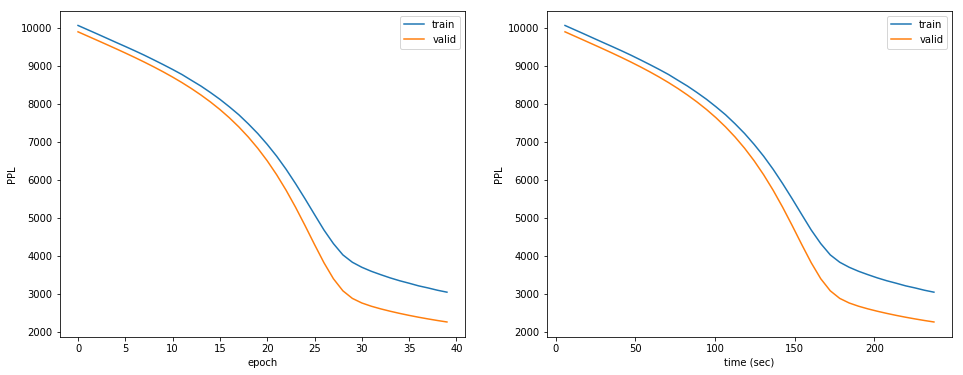

In [98]:
plotcurves3('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')



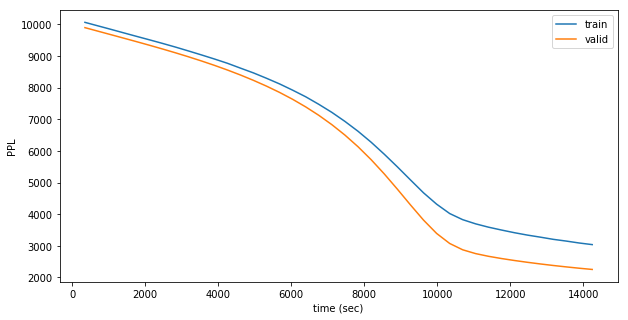

In [68]:
plotcurves2('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')



In [70]:
plotcurves3('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')



NameError: name 'fig' is not defined

<Figure size 720x360 with 0 Axes>

In [19]:
#train_ppls':train_ppls, 
#                   'val_ppls':val_ppls, 
#                   'train_losses':train_losses,
#                   'val_losses':val_losses})

x['train_ppls']
# x['val_ppls']
# x['train_losses']
# x['val_losses']

[10062.5061687182,
 9952.526127901081,
 9842.808267399643,
 9730.851001870084,
 9618.991224396694,
 9508.765123333547,
 9396.261369197158,
 9280.11821900161,
 9157.671006382006,
 9032.587964243095,
 8903.859472021928,
 8769.053387581938,
 8616.289359211116,
 8465.83803672963,
 8296.460019350608,
 8117.776460802457,
 7919.941102500077,
 7710.730994106657,
 7472.487662875841,
 7216.966072360361,
 6931.3221621399925,
 6619.757168393979,
 6274.036222074551,
 5895.981215656643,
 5497.288814422685,
 5084.28216917545,
 4675.716592829088,
 4317.356840470608,
 4020.59107688143,
 3827.1525292103092,
 3694.9127596202916,
 3589.3635605089044,
 3499.8842517735557,
 3415.270955016249,
 3339.959337939881,
 3274.637562133909,
 3205.549550927998,
 3150.7201830232766,
 3089.838550624635,
 3039.0378085693014]

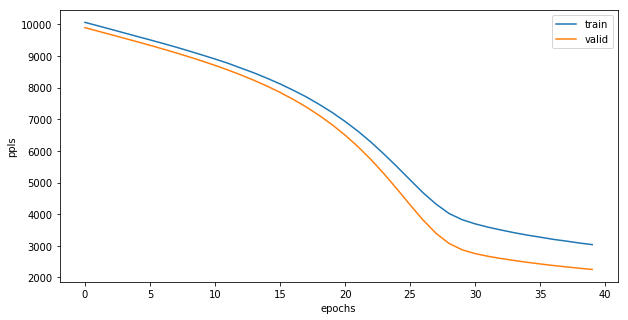

In [24]:


plt.figure(figsize=(10,5))
# Plot training and validation curve
x = range(0, 40)
plt.plot(x, y['train_ppls'], label='train')
plt.plot(x, y['val_ppls'], label='valid')

plt.xlabel('epochs')
plt.ylabel('ppls')
plt.legend()

plt.show()


In [35]:
import pandas

log = pandas.read_csv("RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0/log.txt", header=None, delimiter='\t')

In [36]:
log

,0,1,2,3,4
0,epoch: 0,train ppl: 10062.5061687182,val ppl: 9895.26164314318,best val: 9895.26164314318,time (s) spent in epoch: 353.3383078575134
1,epoch: 1,train ppl: 9952.526127901081,val ppl: 9784.772140224872,best val: 9784.772140224872,time (s) spent in epoch: 353.2396790981293
2,epoch: 2,train ppl: 9842.808267399643,val ppl: 9674.514583707198,best val: 9674.514583707198,time (s) spent in epoch: 353.3025732040405
3,epoch: 3,train ppl: 9730.851001870084,val ppl: 9563.584629033427,best val: 9563.584629033427,time (s) spent in epoch: 353.6913526058197
4,epoch: 4,train ppl: 9618.991224396694,val ppl: 9451.450386828485,best val: 9451.450386828485,time (s) spent in epoch: 355.50464701652527
5,epoch: 5,train ppl: 9508.765123333547,val ppl: 9337.143497139801,best val: 9337.143497139801,time (s) spent in epoch: 355.4422562122345
6,epoch: 6,train ppl: 9396.261369197158,val ppl: 9219.942650958385,best val: 9219.942650958385,time (s) spent in epoch: 355.3144636154175
7,epoch: 7,train ppl: 9280.11821900161,val ppl: 9099.024444057217,best val: 9099.024444057217,time (s) spent in epoch: 355.17821645736694
8,epoch: 8,train ppl: 9157.671006382006,val ppl: 8973.211923652832,best val: 8973.211923652832,time (s) spent in epoch: 355.01885509490967
9,epoch: 9,train ppl: 9032.587964243095,val ppl: 8841.669463885726,best val: 8841.669463885726,time (s) spent in epoch: 355.0510799884796


In [38]:
log[4]

0      time (s) spent in epoch: 353.3383078575134
1      time (s) spent in epoch: 353.2396790981293
2      time (s) spent in epoch: 353.3025732040405
3      time (s) spent in epoch: 353.6913526058197
4     time (s) spent in epoch: 355.50464701652527
5      time (s) spent in epoch: 355.4422562122345
6      time (s) spent in epoch: 355.3144636154175
7     time (s) spent in epoch: 355.17821645736694
8     time (s) spent in epoch: 355.01885509490967
9      time (s) spent in epoch: 355.0510799884796
10     time (s) spent in epoch: 354.9040496349335
11     time (s) spent in epoch: 354.8883023262024
12    time (s) spent in epoch: 354.91088914871216
13     time (s) spent in epoch: 354.9607148170471
14     time (s) spent in epoch: 357.2067286968231
15     time (s) spent in epoch: 358.3556070327759
16    time (s) spent in epoch: 358.28806805610657
17     time (s) spent in epoch: 358.3362863063812
18     time (s) spent in epoch: 358.4573287963867
19    time (s) spent in epoch: 358.53798270225525


In [48]:
x2 = log[4].str.extract('(\d+.\d+)').astype(float)

In [54]:
x3 = x2.cumsum()

In [55]:
x3

,0
0,353.338308
1,706.577987
2,1059.880560
3,1413.571913
4,1769.076560
5,2124.518816
6,2479.833280
7,2835.011496
8,3190.030351
9,3545.081431


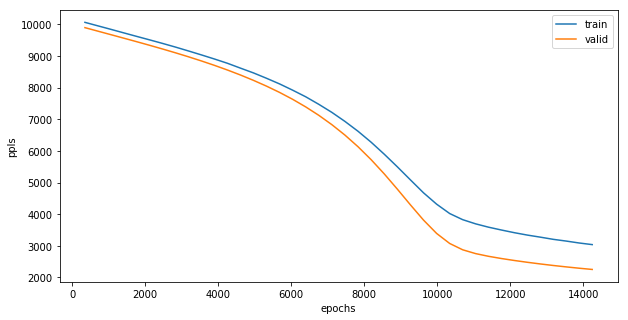

In [56]:
plt.figure(figsize=(10,5))
# Plot training and validation curve
# x = range(0, 40)
plt.plot(x3, y['train_ppls'], label='train')
plt.plot(x3, y['val_ppls'], label='valid')

plt.xlabel('epochs')
plt.ylabel('ppls')
plt.legend()

plt.show()